# **Car Detection Project**

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time

%matplotlib inline

# **Mounting Drive and Loading Data**

In [ ]:
#mount drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive

/
Mounted at /content/gdrive


In [ ]:
# list contents in the project folder on my drive
!ls /mydrive/Uni/Spring\ 2022\ Assignments/Pattern\ Recognition\ \&\ Image\ Processing/

# Unzip the data file
!unzip /mydrive/Uni/Spring\ 2022\ Assignments/Pattern\ Recognition\ \&\ Image\ Processing/Data.zip -d /mydrive/Uni/Spring\ 2022\ Assignments/Pattern\ Recognition\ \&\ Image\ Processing/data/

Streaming output truncated to the last 5000 lines.
  inflating: /mydrive/Uni/Spring 2022 Assignments/Pattern Recognition & Image Processing/data/vehicles/KITTI_extracted/82.png  
  inflating: /mydrive/Uni/Spring 2022 Assignments/Pattern Recognition & Image Processing/data/vehicles/KITTI_extracted/829.png  
  inflating: /mydrive/Uni/Spring 2022 Assignments/Pattern Recognition & Image Processing/data/vehicles/KITTI_extracted/836.png  
  inflating: /mydrive/Uni/Spring 2022 Assignments/Pattern Recognition & Image Processing/data/vehicles/KITTI_extracted/849.png  
  inflating: /mydrive/Uni/Spring 2022 Assignments/Pattern Recognition & Image Processing/data/vehicles/KITTI_extracted/856.png  
  inflating: /mydrive/Uni/Spring 2022 Assignments/Pattern Recognition & Image Processing/data/vehicles/KITTI_extracted/865.png  
  inflating: /mydrive/Uni/Spring 2022 Assignments/Pattern Recognition & Image Processing/data/vehicles/KITTI_extracted/870.png  
  inflating: /mydrive/Uni/Spring 2022 Assignmen

In [ ]:
vehicles = []
non_vehicles = []

!ls /mydrive/Uni/Spring\ 2022\ Assignments/Pattern\ Recognition\ \&\ Image\ Processing/data/

# Divide up into vehicles and non_vehicles
images = glob.glob('/mydrive/Uni/Spring 2022 Assignments/Pattern Recognition & Image Processing/data/*/*/*.png')
for image in images:
    if 'non-vehicles' in image:
        non_vehicles.append(image)
    elif 'vehicles' in image:
        vehicles.append(image)

print ( "Number of images containing vehicles:", len(vehicles))
print ( "Number of images not containing vehicles:", len(non_vehicles))

# print(images[0])

non-vehicles  vehicles
Number of images containing vehicles: 8792
Number of images not containing vehicles: 8968


# **Extracting Features**

In [3]:
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog

# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualize=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualize=vis, feature_vector=feature_vec)
        return features

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256),  orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0, vis=False):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion to YCrCb
        feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
   
        # Apply bin_spatial() to get spatial color features
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        # Apply color_hist() also with a color space option now
        hist_features = color_hist(feature_image, nbins=hist_bins, bins_range=hist_range)
        
        # Call get_hog_features() with vis=False, feature_vec=True
        
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)        
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        
        # Append the new feature vector to the features list
        features.append(np.concatenate((spatial_features, hist_features, hog_features)))
    # Return list of feature vectors
    return features

# **Define parameters**


In [4]:
# Define HOG parameters
orient = 12
pix_per_cell = 8
cell_per_block = 2
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"

# Spatial size and histogram parameters
spatial_size=(16, 16)
hist_bins=16

# **Test and visualization HOG**


Analyzing pictures:  /mydrive/Uni/Spring 2022 Assignments/Pattern Recognition & Image Processing/data/vehicles/GTI_Far/image0003.png
Analyzing pictures:  /mydrive/Uni/Spring 2022 Assignments/Pattern Recognition & Image Processing/data/non-vehicles/GTI/image2863.png


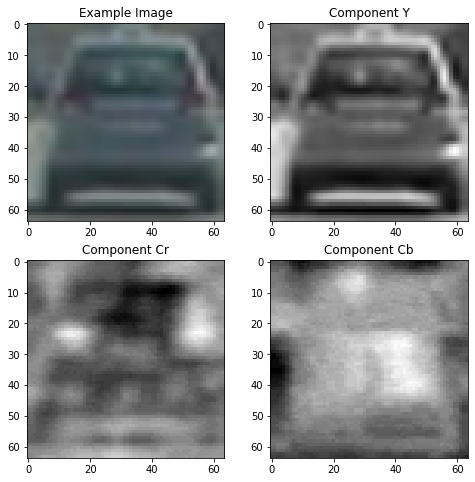

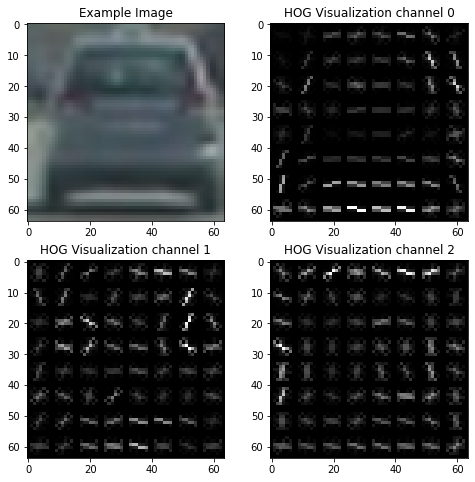

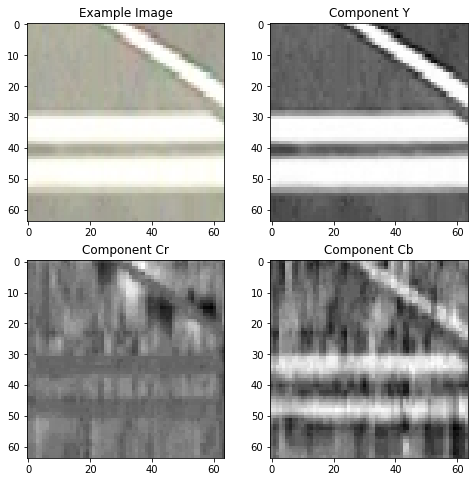

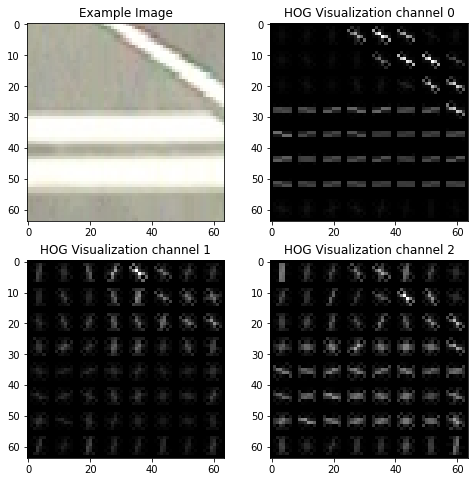

In [ ]:
# Pick for two samples
images = [vehicles[0], non_vehicles[0]]

for img_p in images:
    

    print ("Analyzing pictures: ", img_p)

    # Read in the image
    image = mpimg.imread(img_p)
    # Convert in YCrCb
    image_YCrCb = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)

    # Call our function with vis=True to see an image output
    hog_features = []
    hog_images = []
    for channel in range(image_YCrCb.shape[2]):
        features, hog_image = get_hog_features(image_YCrCb[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=True, feature_vec=True)
        hog_features.append(features)
        hog_images.append(hog_image)


    # Plot the examples
    fig = plt.figure(figsize = (8,8))
    plt.subplot(221)
    plt.imshow(image)
    plt.title('Example Image')
    plt.subplot(222)
    plt.imshow(image_YCrCb[:,:,0], cmap='gray')
    plt.title('Component Y')
    plt.subplot(223)
    plt.imshow(image_YCrCb[:,:,1], cmap='gray')
    plt.title('Component Cr')
    plt.subplot(224)
    plt.imshow(image_YCrCb[:,:,2], cmap='gray')
    plt.title('Component Cb')

    # Plot the examples
    fig = plt.figure(figsize = (8,8))
    plt.subplot(221)
    plt.imshow(image)
    plt.title('Example Image')
    plt.subplot(222)
    plt.imshow(hog_images[0], cmap='gray')
    plt.title('HOG Visualization channel 0')
    plt.subplot(223)
    plt.imshow(hog_images[1], cmap='gray')
    plt.title('HOG Visualization channel 1')
    plt.subplot(224)
    plt.imshow(hog_images[2], cmap='gray')
    plt.title('HOG Visualization channel 2')

# **Extract Feature and Build Classifier**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import pandas as pd
import time
import pickle

print ('Extracting car features')
car_features = extract_features(vehicles, spatial_size=spatial_size, hist_bins=hist_bins, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
print ('Extracting not-car features')
notcar_features = extract_features(non_vehicles, spatial_size=spatial_size, hist_bins=hist_bins, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)

# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',spatial_size, 'spatial_size' , hist_bins, 'hist_bins')
print('HOG: Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

Extracting car features
Extracting not-car features
Using: (16, 16) spatial_size 16 hist_bins
HOG: Using: 12 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 7872


In [ ]:
X_train[0]

array([ 0.25179687,  0.55504601, -0.06519661, ...,  0.88657993,
        2.55136212, -0.40529508])

# **Linear SVC**

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
prediction = svc.predict(X_test[0].reshape(1, -1))
t2 = time.time()
print(t2-t, 'Seconds to predict with SVM')

# Visualize a confusion matrix of the predictions
pred = svc.predict(X_test)
cm = pd.DataFrame(confusion_matrix(pred, y_test))
cm

11.34 Seconds to train SVC...
Test Accuracy of SVC =  0.9885
0.008087158203125 Seconds to predict with SVM


,0,1
0,1795,28
1,13,1716


# **Linear SVC looking for the best C parameter**

In [ ]:
from sklearn.model_selection import GridSearchCV
# Use a linear SVC 
svc1 = LinearSVC()
# Check the training time for the SVC
t=time.time()
parameters = {'C': [0.01, 0.1, 1, 10, 100]}
clf = GridSearchCV(svc1, parameters)
clf.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(clf.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', clf.decision_function(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


295.88 Seconds to train SVC...
Test Accuracy of SVC =  0.9885
My SVC predicts:  [ 1.77264833  3.3481542  -6.67939737  0.22055053 -2.81488237 -1.92255103
 -1.85533607  1.55943162  3.44137237  2.44357774]
For these 10 labels:  [1. 1. 0. 0. 0. 0. 0. 1. 1. 1.]
0.00376 Seconds to predict 10 labels with SVC


# **MLP Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(random_state=1)
t=time.time()
mlp.fit(X_train, y_train)
t2 = time.time()
print(t2-t, 'Seconds to train MLP...')

# Check the score of the MLP
print('Test Accuracy of MLP = ',  round(mlp.score(X_test, y_test),4))


# Check the prediction time for a single sample
t=time.time()
prediction = mlp.predict(X_test[0].reshape(1, -1))
t2 = time.time()
print(t2-t, 'Seconds to predict with MLP')

# Visualize a confusion matrix of the predictions
pred = mlp.predict(X_test)
cm = pd.DataFrame(confusion_matrix(pred, y_test))
cm

55.56333684921265 Seconds to train MLP...
Test Accuracy of MLP =  0.9916
0.00202178955078125 Seconds to predict with MLP


,0,1
0,1797,19
1,11,1725


# **MLP Classifier with custom settings**

In [ ]:
mlp1=MLPClassifier(hidden_layer_sizes=10,solver='sgd',learning_rate_init=0.01,max_iter=500)
t=time.time()
mlp1.fit(X_train, y_train)
t2 = time.time()
print(t2-t, 'Seconds to train MLP...')

# Check the score of the MLP
print('Test Accuracy of MLP = ',  round(mlp1.score(X_test, y_test),4))

# Check the prediction time for a single sample
t=time.time()
prediction = mlp.predict(X_test[0].reshape(1, -1))
t2 = time.time()
print(t2-t, 'Seconds to predict with MLP')

# Visualize a confusion matrix of the predictions
pred = mlp1.predict(X_test)
cm = pd.DataFrame(confusion_matrix(pred, y_test))
cm


26.804221391677856 Seconds to train MLP...
Test Accuracy of MLP =  0.9904
0.0015532970428466797 Seconds to predict with MLP


,0,1
0,1797,23
1,11,1721


# **Save data**

In [ ]:
# Save a dictionary into a pickle file.
import pickle

classifier_info = { "svc": svc, "scaler": X_scaler, "orient": orient, "pix_per_cell": pix_per_cell,
"cell_per_block": cell_per_block, "spatial_size": spatial_size, 'hist_bins': hist_bins }

pickle.dump( classifier_info, open( "/mydrive/Uni/Spring 2022 Assignments/Pattern Recognition & Image Processing/classifier_info.p", "wb" ) )

#svc2 = joblib.load('svc_model.pkl') 
#n_predict = 10
#print('My SVC predicts: ', svc2.predict(X_test[0:n_predict]))
#print('For these',n_predict, 'labels: ', y_test[0:n_predict])
